In [1]:
# Decision Trees - versatile ML algorithms - both classification and regression, even output multiple tasks
# - capable of fitting complex datasets
# - fundamental components of Random Forests (one of the most powerful Ml algorithms)

In [2]:
# So how do we train and visualize them? - test on iris dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

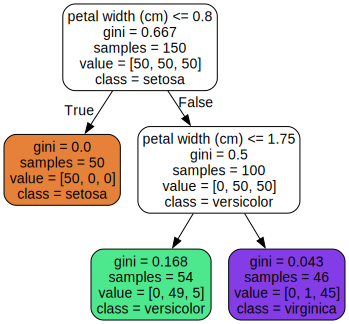

In [4]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [5]:
# So how does it make predictions? E.g. by classifying an iris flower
# - start with root node (depth 0) - asks if the petal length is smaller than 2.45 cm? If true, move left (it leaf node - no children nodes)
# - If not move right (depth 1) - now ask: is petal width smaller than 1.75 cm? If yes -> Versicolor (left), if not -> Virginica (right) - depth 2

# Benefits of decision trees - require very little preparation: e.g. feature scaling and centering - not needed

# Node's sample attribute counts how many training instances it applies to - e.g. 100 instances have a petal length greater than 2.45cm (depth 1, right)
# Node's value attribute - tells you how many training instances of each class this node applies to:
# - e.g. bottom right - node appliea to 0 Iris-Setosa, 1 Iris-Versicolor, and 45 Iris-Virginica
# Node's gini attribute measures its impurity  - a node is pure (gini=0) if all training instances it applies to belong to the same class
# - e.g. depth-1 left node applies only to Iris-Seratosa training instances -> it is pure
# - G_i = 1 - sum_classes(p_i,k^2): for depth-2, left: G = 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168
#   - p_i,k - ratio of class k instances among the training instances in the i^th node

# Scikit-Learn uses CART algorith - only binary trees - nonleaf nodes always have two childre - yes/no answers
# There are other algorithms (e.g. ID3) that can produce Decision Trees with node with more than two children

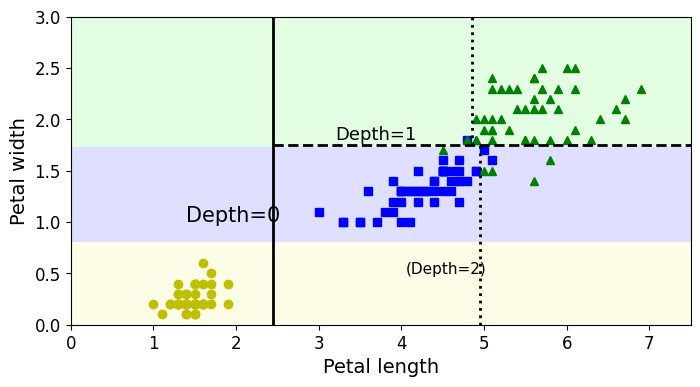

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [7]:
# Figure above shows DT's decision boundaries
# Thick verical line - decision boundary of the root node (depth 0) - right area = pure, left = unpure - needs to be split further
# -> add another horizontal line at the petal with 1.75
# Since the max_depth was set to 2 - DT stops there
# If max_depth were set to 3 -> two depth-2 nodes would each add another decision boundary (dottet lines)

In [8]:
# DT - farily intuitive and have easy to interpert decisions - therefore called white box models
# - classification rules are simple and can even be applied manually if need be
# In contrast, Random Forest or Neural Networks - generally considered black box models
# -> they make great predicitons, and you can easily check the calculations that they performed to make predictions
#    however, it's hard to explain in simple terms why the predictions were made
#    E.g., NN recognizes a person on a picture, but its hard to know what actually contributed to this decision
#    -> did the model recognize the eyes/mouth/nose/shoes/the couch they are sitting one?


In [9]:
# Estimating class probabilities
# with DT - can also estimate the probability that an instance belongs to a particular class k:
# first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances k in this node
# e.g. flower with 5cm long and 1.5 cm wide petals -> corresponding node: depth-2 left:
# -> output probabilities: 0% Iris-Setosa(0/54), 90.7% Iris Versicolor (49/54), and 9.3% Iris-Virginica (5/54)
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [10]:
tree_clf.predict([[5, 1.5]])

array([1])

In [11]:
# The CART Training Algorithm:
# used by Scikit-learn: Classification and Regression Tree (CART) algorithm to train decision trees
# Idea = simple: first split the training set in two subsets using a single feature k and threshold t_k (e.g. 'petal length =< 2.45 cm')
# So how to choose k and t_k? It searches for a pair (k, t_k) that produces the purest subsets (weighted by their size)
# - CART cost function for classification - on p. 182: J(k, t_k) = m_left/m * G_left + m_right/m * G_right
#  - with G_left/right measurese the impurity of the left/right subset
#  - with m_left/right - number of instances in the left/right subset

# Once the training set has been sucessfully split in two, it continues to split the subsets using the same logic recursevily 
# until it reaches the maximum depth or if it cannot find a split that will reduce impurity
# Other hyperparameters - control additional stopping conditions
# - e.g. min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes

# CART = greedy algorithm - it searches for an optimum split at the top level and then repeats the process at each depth
# - it does not check whether or not the split will lead to the lowest possible impurity several levels down
# - often this approach produces a reasonably good solution but is not guaranteed to be optimal

# Finding the optimal tree - an NP-Complete problem - requires O(exp(m)) time, making the problem intractable for even for fairly small training sets
# That's why we settle for "reasonably good" solution

In [12]:
# Computational complexity
# For predictions: DTs are generally apporoximately balanced, so traversing requires going through rougly O(log_2(m)) nodes:
# Since each node only requires checking the value of one feature, the overall prediction complxity is just O(log_2(m)), independent of other features
# -> making predictions: very fast

# Training algorithms, however, compares all features on all samples at each node (unless max_features is set)
# -> results in O(n x m x log(m)) complexity 
# For small training sets (< 1000), Scikit-Learn can speed the training by presorting the data (set presort=True),
# but it slows down training for larger datasets


In [13]:
# By default - Gini impurity measure is used
# alternative - entropy impurity:
# - entropy originated in thermodynamics as a measure of molecular disorder (Entropy = 0 whem moledules are still and well ordered)
# - later is spread to information theory - measures the average information content of a message (Entropy = 0 when all messages are identical)
# - in ml: frequently used as a impurity measure: A set's entropy is zero when it contains instances of only one class
# --> equation: on page 184: H_i = - sum_class (p_i,k * log_2(p_i,k)) - entropy of the i^th node
# -- example for depth-2 left node: H = -49/54 * log_2(49/54) - 5/54 * log_2(5/54) = 0.445

# So which one to use?
# In mode cases - no big difference - lead to similar trees
# Gini impurity slighlty faster to compute - good default
# However, when they differ - Gini tends to isolate the most frequent classs in its own branch of the tree
# Entropy tends to produce slighlty more balanced trees

In [14]:
# Regularization Hyperparameters
# DT's make very few assumptions about the training data
# If left unconstrained - Tree structure will adapt itself to the training data, fitting it very closely (most likely overfitting)
# - such model = nonparametric model - number of parameters is not determined prior to training
# - opposite - parametric model has predetermined number of parameters - its degree of freedom is limited (reduces the risk of overfitting)

# DT's need to be restricted during training to reduce its freedom - regularization
# depends on the algorithm, but usually can at least restrict the max. depth of the DT (max_depth hyperparameter)

# DecisionTreeClassifier class - has a few other parameters:
# - min_samples_split - minimum number of samples node must have before it can split
# - min_samples_leaf - minimum number of samples a leaf node must have
# - min_weight_fraction_leaf - same as one above but expressed as a fraction of the total number of weighted instances
# - max_leaf_nodes - max. number of leaf nodes
# - max_features - max. number of features evaluated at each node
# Increasoing the min_* and reducing the max_* hyperparameters will regularize the model

# Can also do unregularized training of DTs and then "prune" unnecessary nodes:
# - a node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not statistically signoficant
# - standard statistical tests (e.g. X^2 test) to estimate the probability that the improvement is purely the result of chance (null hypothesis)

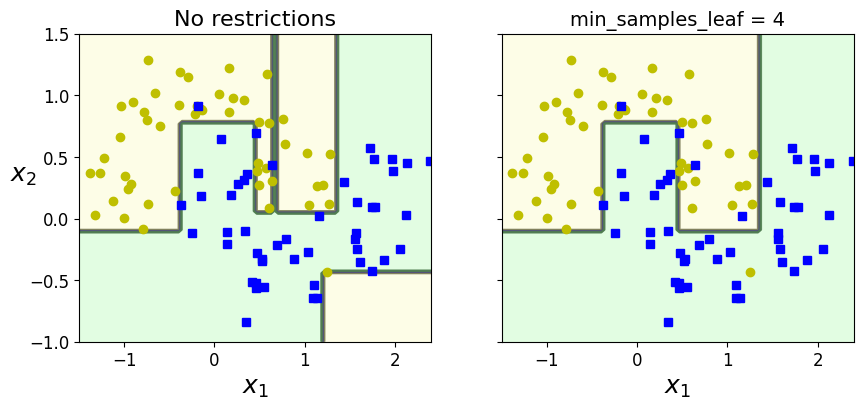

In [15]:
# Example of no regularization vs reg. of DT's:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

In [ ]:
# Left - default hyperparams, i.e. no regularization - obvious that the model is overfitting
# Right - DT with min_samples_leaf = 4 - seems that it will generalize better